# <b><font color = green|><b><p style = 'text-align:center'>Heart Disease Detection Project 

In [281]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import numpy as np
from scipy import stats

%matplotlib inline
sns.set_style("darkgrid")
plt.style.use("classic")


In [282]:
#read data
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Sure! Let's go through each feature in the dataset and discuss their meanings:

1. **Age:** This feature represents the age of the patient. It is a numerical value that indicates the age in years.

2. **Sex:** This feature indicates the sex of the patient. It is a binary variable, where 1 represents male and 0 represents female.

3. **Chest Pain (cp)ឈឺទ្រូង:** This feature describes the type of chest pain experienced by the patient. It is categorical and has four possible values: 0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, and 3 for asymptomatic.

4. **Resting Blood Pressure (trestbps)
សម្រាកសម្ពាធឈាម:** This feature represents the resting blood pressure of the patient. It is a numerical value measured in mm Hg (millimeters of mercury).

5. **Cholesterol (chol):** This feature indicates the serum cholesterol level of the patient in mg/dl (milligrams per deciliter).

6. **Fasting Blood Sugar (fbs):** This feature represents the fasting blood sugar level of the patient. It is a binary variable, where 1 indicates that the fasting blood sugar is greater than 120 mg/dl, and 0 indicates it is not.

7. **Resting Electrocardiographic Results (restecg):** This feature describes the resting electrocardiographic results of the patient. It is categorical and has three possible values: 0 for normal, 1 for having ST-T wave abnormality, and 2 for showing probable or definite left ventricular hypertrophy.

8. **Maximum Heart Rate Achieved (thalach):** This feature represents the maximum heart rate achieved by the patient during exercise. It is a numerical value measured in beats per minute.

9. **Exercise Induced Angina (exang):** This feature indicates whether the patient experienced exercise-induced angina or not. It is a binary variable, where 1 represents the presence of angina and 0 represents the absence.

10. **ST Depression Induced by Exercise Relative to Rest (oldpeak):** This feature represents the ST depression induced by exercise relative to rest. It is a numerical value.

11. **Slope of the Peak Exercise ST Segment (slope):** This feature describes the slope of the peak exercise ST segment. It is categorical and has three possible values: 0 for downsloping, 1 for flat, and 2 for upsloping.

12. **Number of Major Vessels (ca):** This feature indicates the number of major vessels colored by fluoroscopy. It is a numerical value.

13. **Thalassemia (thal):** This feature represents thalassemia, a blood disorder
ជំងឺឈាម, in the patient. It is categorical and has three possible values: 1 for normal, 2 for fixed defect, and 3 for reversible defect.

14. **Target:** This feature is the target variable that indicates whether the patient has heart disease or not. It is a binary variable, where 0 represents the absence of heart disease and 1 represents the presence.

These features are commonly used in predicting heart disease and understanding the factors that contribute to it. They provide valuable information for medical diagnosis and risk assessment.

### <font color = green|><b>Data Exploration 

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [284]:
data.shape

(1025, 14)

### <font color = green|><b>Count presence and absence of heart disease

In [285]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [286]:
data.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=600
)

:Bars   [index]   (target)

### <font color = green|><b>Check missing values

In [287]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [288]:
for column in data.columns:
    unique_values = data[column].unique()
    unique_values.sort()  # Sort the unique values in ascending order
    print(f"Content values in {column}: {unique_values}\n")

Content values in age: [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]

Content values in sex: [0 1]

Content values in cp: [0 1 2 3]

Content values in trestbps: [ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200]

Content values in chol: [126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 31

In [289]:
categorical_val = []
continous_val = []

for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [290]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [291]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### <font color = green|><b>Count heart disease by sex

```Sex: This feature indicates the sex of the patient. It is a binary variable, where```  
- ```1 represents male```
- ```0 represents female.```

In [292]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients haven't Heart Disease: 48.68%
Percentage of Patients have Heart Disease: 51.32%


In [293]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

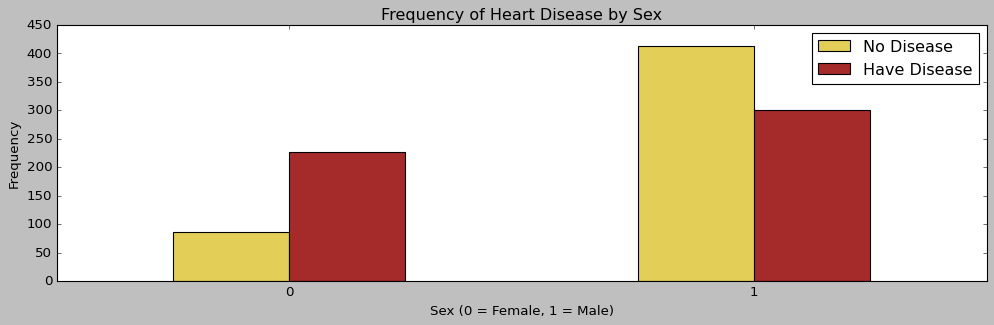

In [294]:
#calculate frequency of heart disease by sex
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,4),color=['#E3CF57', "#A52A2A" ])
plt.title('Frequency of Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### <font color = green|><b>Heart disease by fbs(Fasting Blood Sugar)

```Fasting Blood Sugar (fbs): This feature represents the fasting blood sugar level of the patient. It is a binary variable, where```
- ```1 indicates that the fasting blood sugar is greater than 120 mg/dl```
- ```0 indicates it is not.```

In [295]:
unique_values = data['fbs'].unique()
unique_values.sort()  # Sort the unique values in ascending order
print(f"Content values in {column}: {unique_values}")

Content values in target: [0 1]


In [296]:
have_disease = data.loc[data['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = data.loc[data['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Fbs.I  :Bars   [index]   (fbs)
   .Bars.Fbs.II :Bars   [index]   (fbs)

### <font color = green|><b>Heart disease by chest_pain

```Chest Pain (cp)ឈឺទ្រូង: This feature describes the type of chest pain experienced by the patient. It is categorical and has four possible values: ```
- ```0 for typical angina```
- ```1 for atypical angina```
- ```2 for non-anginal pain```
- ```3 for asymptomatic.```

In [297]:
unique_values = data['cp'].unique()
unique_values.sort()  # Sort the unique values in ascending order
print(f"Content values in {column}: {unique_values}")

Content values in target: [0 1 2 3]


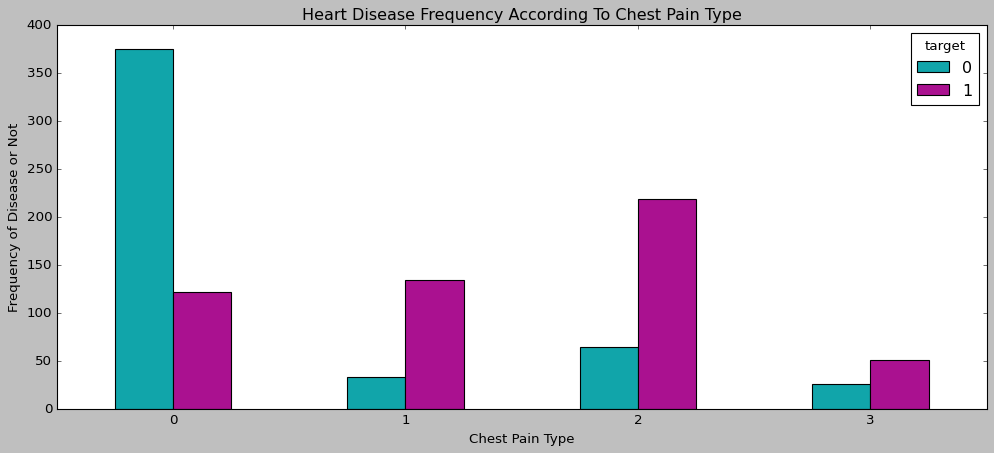

In [298]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### <font color = green|><b> Heart disease by age 

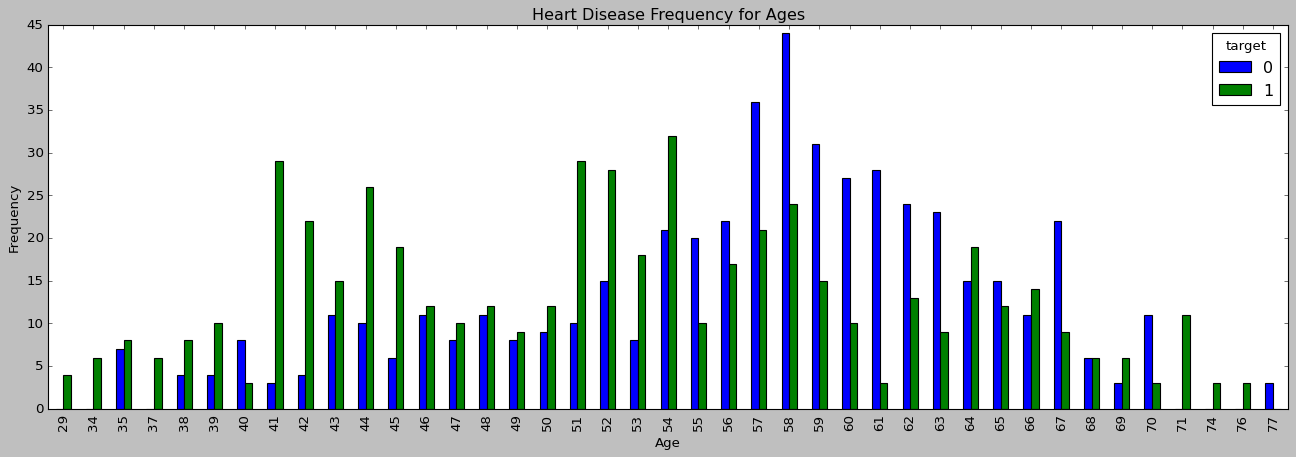

In [299]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

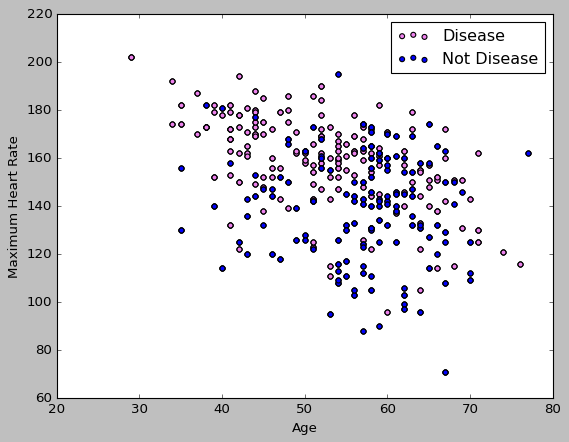

In [300]:
#calculate frequency of heart disease by Maximum heart rate
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="violet")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

### <font color = green|><b>Heart Disease by ST segment 

```Slope of the Peak Exercise ST Segment (slope) : This feature describes the slope of the peak exercise ST segment. It is categorical and has three possible values: ```
- ```0 for downsloping```
- ```1 for flat```
- ```2 for upsloping.```

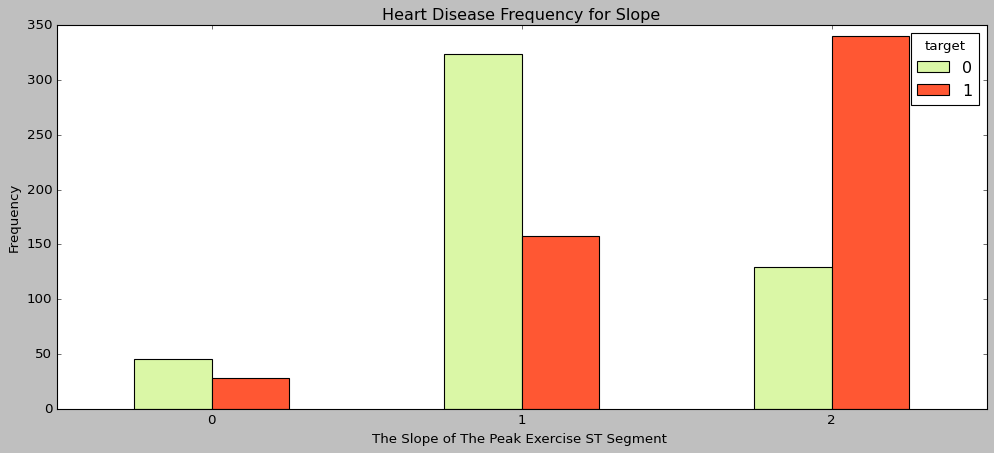

In [301]:
#calculate slope of ST segment 
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

### <font color = green|><b>Summary by histogram 

*** Categorical Variable ***

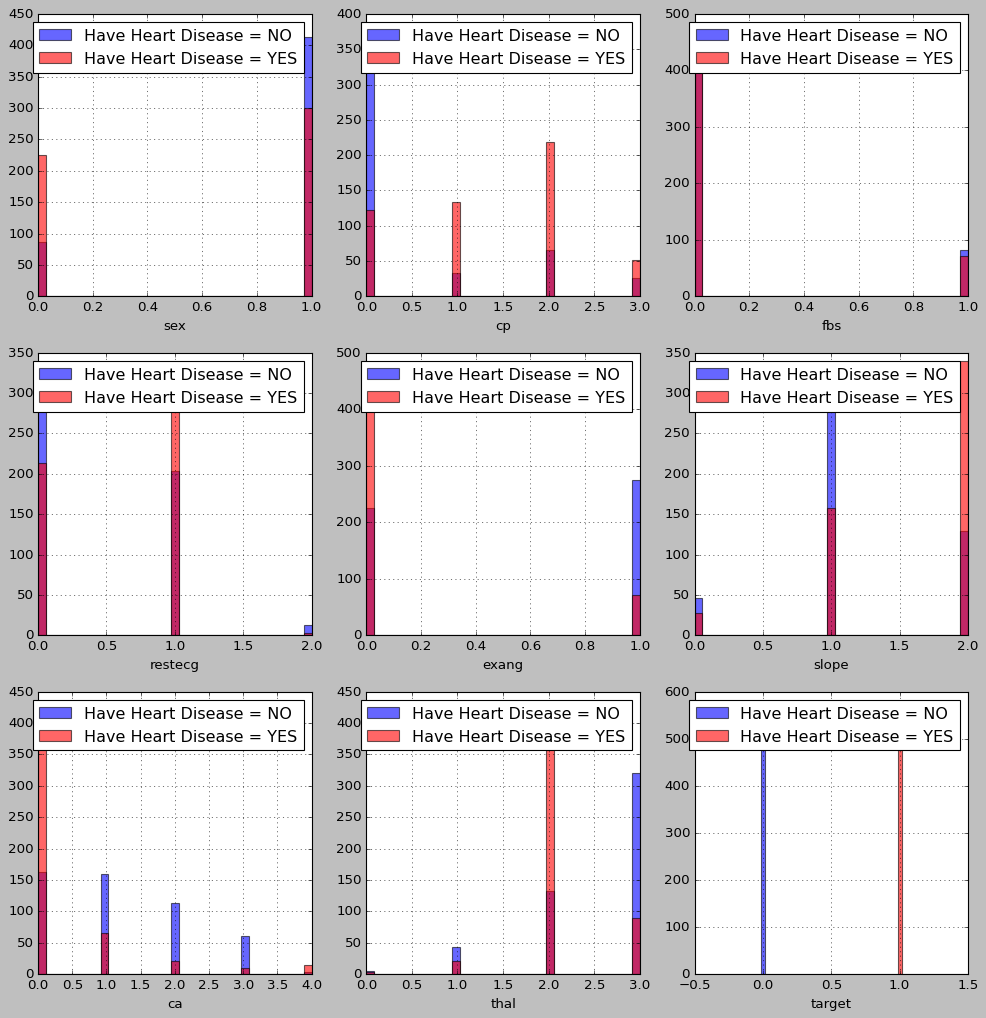

In [302]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<font color = green|><b>***Numerical Variable ***

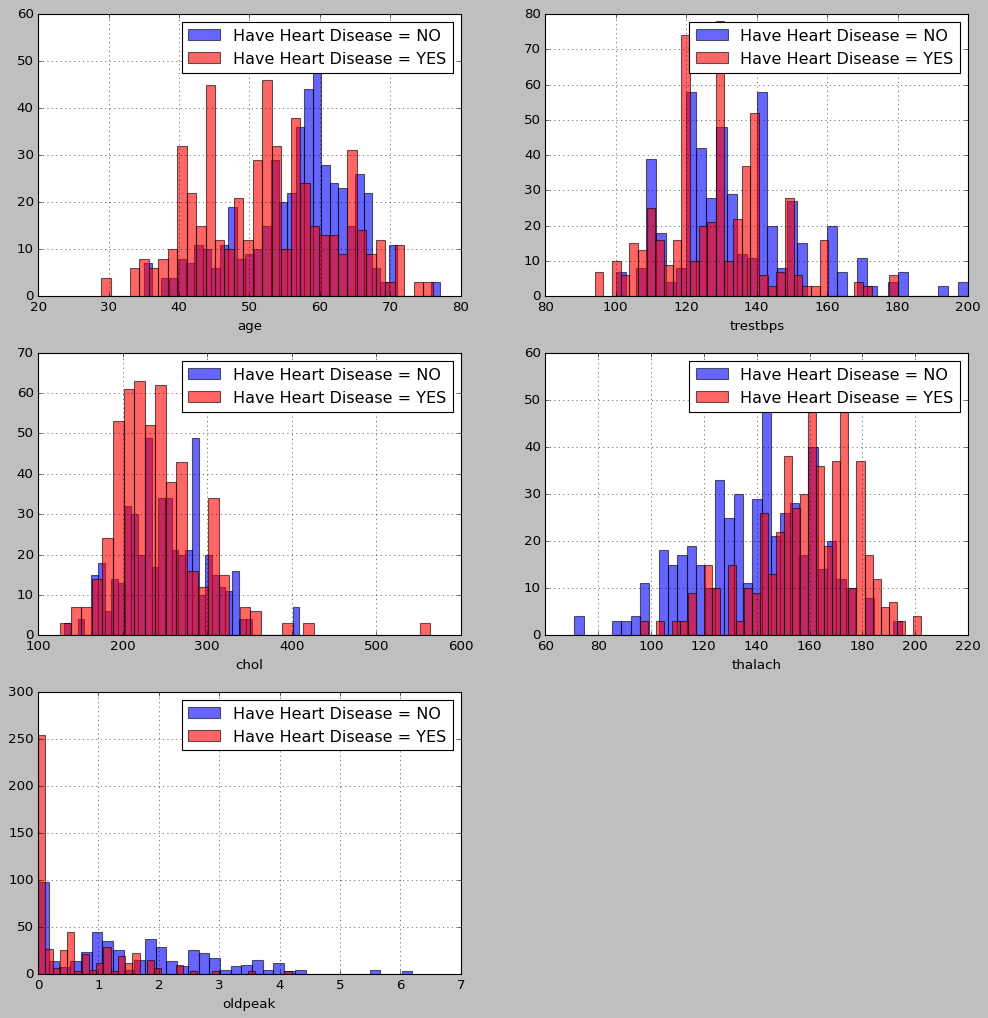

In [303]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

### <font color =green|><b>Finding correlation between each columns by using heatmap

(14.5, -0.5)

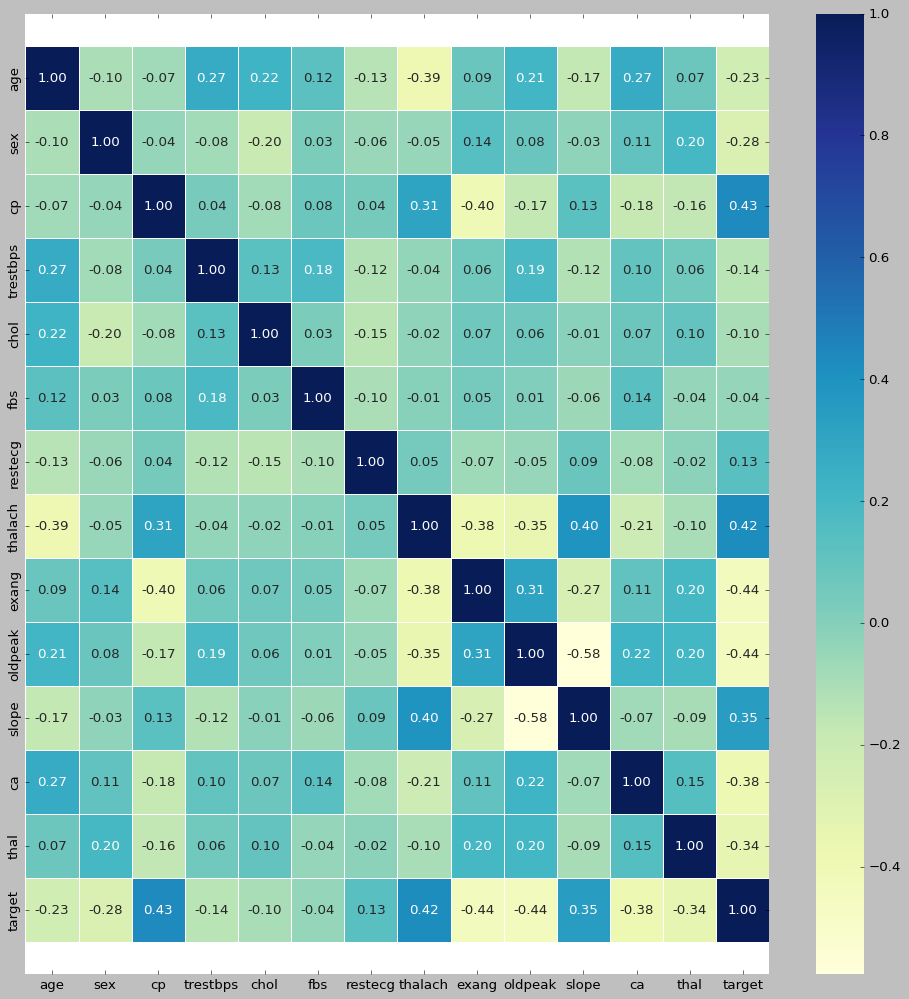

In [304]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [310]:
# Find the features with correlation coefficient >= 0.5
highly_correlated_features = corr_matrix[corr_matrix >= 0.5].stack()

# Display the highly correlated features
print(highly_correlated_features)

age       age         1.0
sex       sex         1.0
cp        cp          1.0
trestbps  trestbps    1.0
chol      chol        1.0
fbs       fbs         1.0
restecg   restecg     1.0
thalach   thalach     1.0
exang     exang       1.0
oldpeak   oldpeak     1.0
slope     slope       1.0
ca        ca          1.0
thal      thal        1.0
target    target      1.0
dtype: float64


### <font color = green|><b>Creating dummy variables 

In [261]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [262]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [263]:
print(data.columns)    # numerical variable
print('\n') 
print(dataset.columns) # categorical or dummies variable 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [264]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [265]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### <font color = green|><b> Model building 

In [266]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [318]:
from sklearn.model_selection import train_test_split
X = dataset.drop('target', axis=1)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### <font color = green|><b>Logistic regression

In [268]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.907692    0.885204  0.895397    0.896448      0.895868
recall       0.867647    0.920424  0.895397    0.894036      0.895397
f1-score     0.887218    0.902471  0.895397    0.894844      0.895238
support    340.000000  377.000000  0.895397  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[295  45]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.850340    0.788820  0.818182    0.819580      0.820579
recall       0.786164    0.852349  0.818182    0.819256      0.818182
f1-score     0.816993    0.819355  0.818182    0.818174      0.818136
support    159.000000  149.000000  0.818182  308.000000    308.

In [269]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182


In [273]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Create a logistic regression model
logreg = LogisticRegression()

# Use Recursive Feature Elimination (RFE)
selector = RFE(estimator=logreg, n_features_to_select=5)
selector.fit(X_train, y_train)

# Get the selected feature names
selected_feature_names = X_train.columns[selector.support_]

# Print the selected features
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['cp_0', 'slope_1', 'ca_0', 'ca_4', 'thal_3'], dtype='object')


In [274]:
# Create a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Get the coefficients (weights) of the logistic regression model
coefficients = logreg.coef_[0]

# Calculate feature scores
feature_scores = abs(coefficients)  # Use absolute values for importance

# Create a DataFrame to store feature names and scores
feature_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Score': feature_scores
})

# Sort the DataFrame by feature scores in descending order
feature_scores_df = feature_scores_df.sort_values('Score', ascending=False)

# Print the feature scores
print("Feature Scores:")
print(feature_scores_df)

Feature Scores:
      Feature     Score
23       ca_2  1.471037
21       ca_0  1.455367
25       ca_4  1.355328
7        cp_0  1.287840
10       cp_3  0.904967
5       sex_0  0.879146
6       sex_1  0.879142
29     thal_3  0.771199
22       ca_1  0.753597
19    slope_1  0.702802
27     thal_1  0.646417
28     thal_2  0.645150
4     oldpeak  0.608558
2        chol  0.605663
20    slope_2  0.594538
24       ca_3  0.586057
9        cp_2  0.521331
26     thal_0  0.520363
3     thalach  0.461768
1    trestbps  0.337511
16    exang_0  0.275298
17    exang_1  0.275294
0         age  0.246937
14  restecg_1  0.149346
15  restecg_2  0.140901
8        cp_1  0.138454
12      fbs_1  0.132013
11      fbs_0  0.132009
18    slope_0  0.108268
13  restecg_0  0.008441


In [278]:
from sklearn.preprocessing import StandardScaler

# Separate the features (X) and target variable (y)
X = data.drop('target', axis=1)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the logistic regression model to the standardized data
logreg.fit(X_scaled, y)

# Predict the probability of each instance being an outlier
outlier_probabilities = logreg.predict_proba(X_scaled)[:, 1]

# Set a threshold to classify outliers (e.g., top 5% with highest probabilities)
threshold = np.percentile(outlier_probabilities, 95)

# Identify the instances that exceed the threshold as outliers
outliers = X[outlier_probabilities > threshold]

# Print the identified outliers
print("Identified Outliers:")
outliers

Identified Outliers:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2
23,63,0,2,135,252,0,0,172,0,0.0,2,0,2
24,42,0,2,120,209,0,1,173,0,0.0,1,0,2
68,37,0,2,120,215,0,1,170,0,0.0,2,0,2
84,37,0,2,120,215,0,1,170,0,0.0,2,0,2
90,54,0,2,108,267,0,0,167,0,0.0,2,0,2
100,43,0,2,122,213,0,1,165,0,0.2,1,0,2
104,52,1,3,118,186,0,0,190,0,0.0,1,0,1
125,60,0,3,150,240,0,1,171,0,0.9,2,0,2


In [279]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8181818181818182
Precision: 0.7888198757763976
Recall: 0.8523489932885906
F1 Score: 0.8193548387096774
AUC-ROC: 0.9169726900510743


In [319]:
# Tranform feature when there has no feature exist correlation coefficient > 0.5 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the logistic regression model to the polynomial features
logreg.fit(X_train_poly, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test_poly)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9512987012987013


### <font color = greeen|><b>K-nearest neighbour

In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.914454    0.920635  0.917713    0.917545      0.917704
recall       0.911765    0.923077  0.917713    0.917421      0.917713
f1-score     0.913108    0.921854  0.917713    0.917481      0.917707
support    340.000000  377.000000  0.917713  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[310  30]
 [ 29 348]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.860140    0.781818  0.818182    0.820979      0.822250
recall       0.773585    0.865772  0.818182    0.819678      0.818182
f1-score     0.814570    0.821656  0.818182    0.818113      0.817998
support    159.000000  149.000000  0.818182  308.000000    308.

In [236]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\LH\AppData\Local\Temp\ipykernel_15908\1715872608.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182


### <font color = green|><b>Support vector machine 

In [150]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.969419    0.941026  0.953975    0.955222      0.954490
recall       0.932353    0.973475  0.953975    0.952914      0.953975
f1-score     0.950525    0.956975  0.953975    0.953750      0.953916
support    340.000000  377.000000  0.953975  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[317  23]
 [ 10 367]]

Test Result:
Accuracy Score: 90.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.944828    0.865031  0.902597    0.904929      0.906225
recall       0.861635    0.946309  0.902597    0.903972      0.902597
f1-score     0.901316    0.903846  0.902597    0.902581      0.902540
support    159.000000  149.000000  0.902597  308.000000    308.

In [151]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\LH\AppData\Local\Temp\ipykernel_15908\446375890.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182
2,Support Vector Machine,95.397490,90.259740


### <font color = green|><b>Decision tree

In [152]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946429    1.000000  0.970779    0.973214      0.972345
recall       1.000000    0.939597  0.970779    0.969799      0.970779
f1-score     0.972477    0.968858  0.970779    0.970668      0.970726
support    159.000000  149.000000  0.970779  308.000000    308.000000
_______________________________________________

In [153]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\LH\AppData\Local\Temp\ipykernel_15908\490717132.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182
2,Support Vector Machine,95.397490,90.259740
3,Decision Tree Classifier,100.000000,97.077922


### <font color = green|><b>Random forest 

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.963636    1.000000  0.980519    0.981818      0.981228
recall       1.000000    0.959732  0.980519    0.979866      0.980519
f1-score     0.981481    0.979452  0.980519    0.980467      0.980500
support    159.000000  149.000000  0.980519  308.000000    308.000000
_______________________________________________

In [155]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\LH\AppData\Local\Temp\ipykernel_15908\2869621319.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182
1,K-nearest neighbors,91.771269,81.818182
2,Support Vector Machine,95.397490,90.259740
3,Decision Tree Classifier,100.000000,97.077922
4,Random Forest Classifier,100.000000,98.051948


### <font color = green|><b>Conclusion</b></font>
```The project involved analysis of the heart disease patient dataset with proper data processing. Then, 5 models were trained and tested with maximum scores as follows:```
- ```Logistic Regression           81.818182```
- ```K-nearest neighbors           81.818182```
- ```Decision Tree Classifier      97.077922```
- ```Random Forest Classifier      98.051948```
- ```Support Vector Machine        90.259740```
   
```Random Forest Classifier scored is the best score of 98%.```
```Therefore, Random Forest is the best model for performance testing```

# <font color = green|><b><p style = 'text-align:center'>The End